In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
cd ..

/home/suriya/dcu/Group-Project


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Collect data sets

In [4]:
from src.featutils import aggregate_features_from_folder
from src.features.t62020 import extract_features_from_file, postproc_feature_frame
from src.features.t62020 import PREDICTORS, TARGET

In [7]:
test_key = pd.read_csv('data/tc4tl_test_key/tc4tl/docs/tc4tl_test_key.tsv', sep='\t')
test_data_dir = 'data/tc4tl_data_v5/tc4tl/data/test/'
testset, testset_encoders = aggregate_features_from_folder(test_data_dir, test_key,
                               feat_fn=extract_features_from_file,
                               postproc_fn=postproc_feature_frame,
                               predictors=PREDICTORS, target=TARGET)

100%|██████████| 8423/8423 [00:10<00:00, 810.41it/s]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [8]:
train_key = pd.read_csv('data/tc4tl_training_data_v1/tc4tl/docs/tc4tl_train_key.tsv', sep='\t')
train_data_dir = 'data/tc4tl_training_data_v1/tc4tl/data/train/'
trainset, trainset_encoders = aggregate_features_from_folder(train_data_dir, train_key,
                                                            feat_fn=extract_features_from_file,
                                                            postproc_fn=postproc_feature_frame,
                                                            predictors=PREDICTORS, target=TARGET)

100%|██████████| 15552/15552 [00:20<00:00, 747.87it/s]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [9]:
dev_key = pd.read_csv('data/tc4tl_data_v5/tc4tl/docs/tc4tl_dev_key.tsv', sep='\t')
dev_data_dir = 'data/tc4tl_data_v5/tc4tl/data/dev/'
devset, devset_encoders = aggregate_features_from_folder(dev_data_dir, dev_key,
                               feat_fn=extract_features_from_file,
                               postproc_fn=postproc_feature_frame,
                               predictors=PREDICTORS, target=TARGET)

100%|██████████| 935/935 [00:01<00:00, 562.33it/s]
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [46]:
trainset

,fileid,NormMeanRssi,NormPathLossAttenuation,PredictedDistance,TXPower,TXDeviceEnc,RXDeviceEnc,TXCarryEnc,RXCarryEnc,RXPoseEnc,TXPoseEnc,CoarseGrainEnc,Distance
0,aaadbuvp_tc4tl20.csv,0.343245,0.724865,2.453292,12,11,4,1,0,1,1,1,1.8
1,aaamkcii_tc4tl20.csv,0.470944,0.524600,1.147594,8,0,8,1,1,1,1,0,3.0
2,aabqtowt_tc4tl20.csv,0.340356,0.727730,2.481524,12,5,0,0,0,1,1,0,1.2
3,aadkjwss_tc4tl20.csv,0.235470,0.831733,4.610273,12,7,0,1,1,0,0,0,1.8
4,aafzrgzt_tc4tl20.csv,0.461564,0.607543,1.395231,12,6,4,0,0,1,0,1,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15547,zzwcoemu_tc4tl20.csv,0.327185,0.740789,2.682236,12,11,4,1,0,1,1,0,1.2
15548,zzwoqxuc_tc4tl20.csv,0.066840,0.906891,12.480233,7,2,2,0,0,0,1,0,4.5
15549,zzymwbbb_tc4tl20.csv,0.114204,0.878336,9.435060,8,14,9,1,1,1,0,0,1.2
15550,zzzflikz_tc4tl20.csv,0.302623,0.673093,2.977816,7,2,2,0,0,0,1,1,1.8


## Apply PCA

In [38]:
from sklearn.decomposition import PCA

In [28]:
X_pca = PCA(n_components=2).fit_transform(trainset[PREDICTORS])
dev_pca = PCA(n_components=2).fit_transform(devset[PREDICTORS])
test_pca = PCA(n_components=2).fit_transform(testset[PREDICTORS])

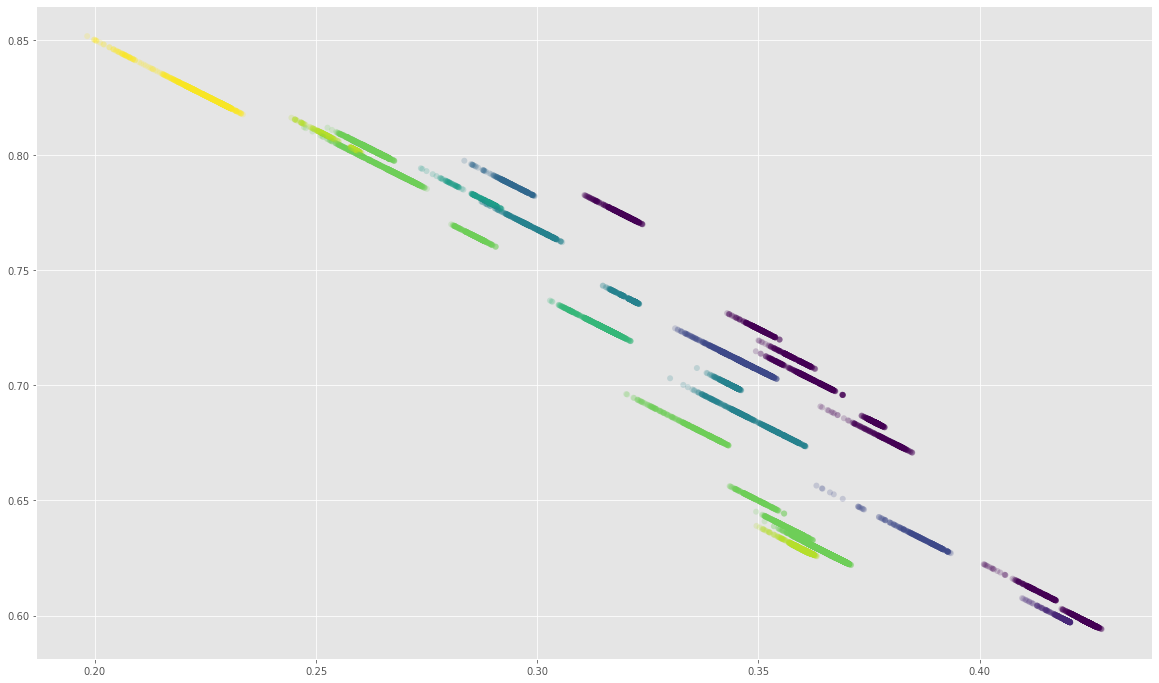

In [50]:
X_new = pca.inverse_transform(X_pca)
dev_new = pca.inverse_transform(dev_pca)
test_new = pca.inverse_transform(test_pca)
#plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.figure(figsize=(20, 12))
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2, edgecolor='none', c=trainset.RXDeviceEnc);
#plt.scatter(test_new[:, 0], test_new[:, 1], alpha=0.2, c='green')
# plt.scatter(dev_new[:, 0], dev_new[:, 1], alpha=0.3, c=devset.RXDeviceEnc, cmap='viridis')

#plt.axis('equal');

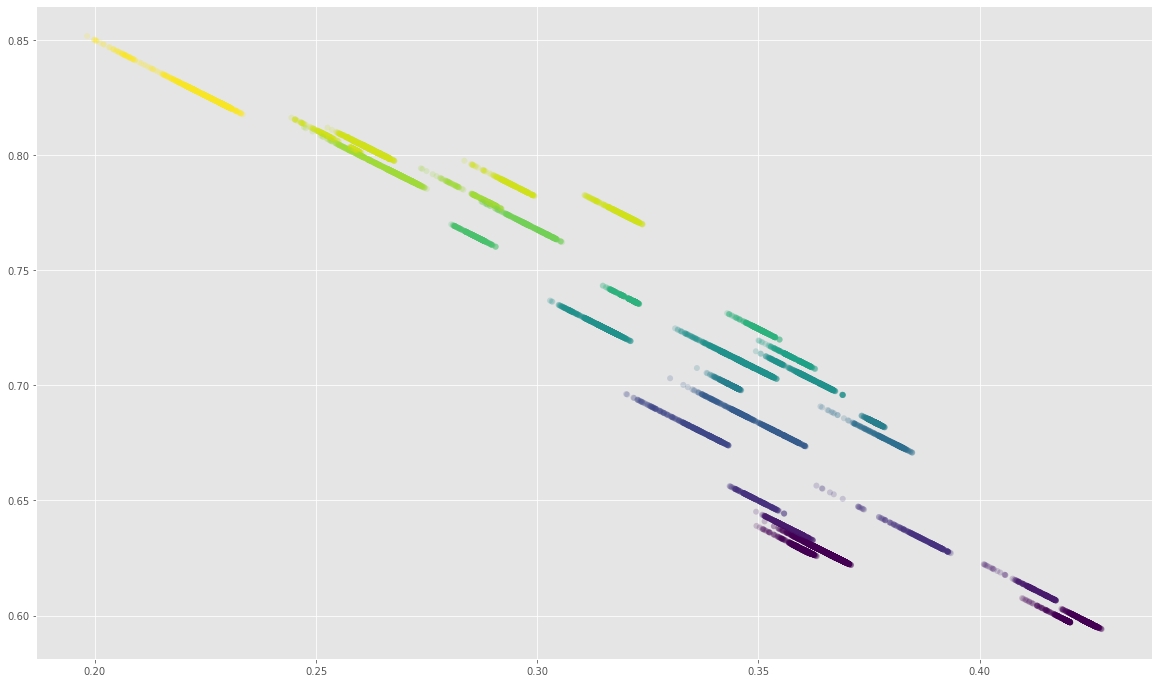

In [52]:
plt.figure(figsize=(20, 12))
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2, edgecolor='none', c=trainset.TXDeviceEnc);

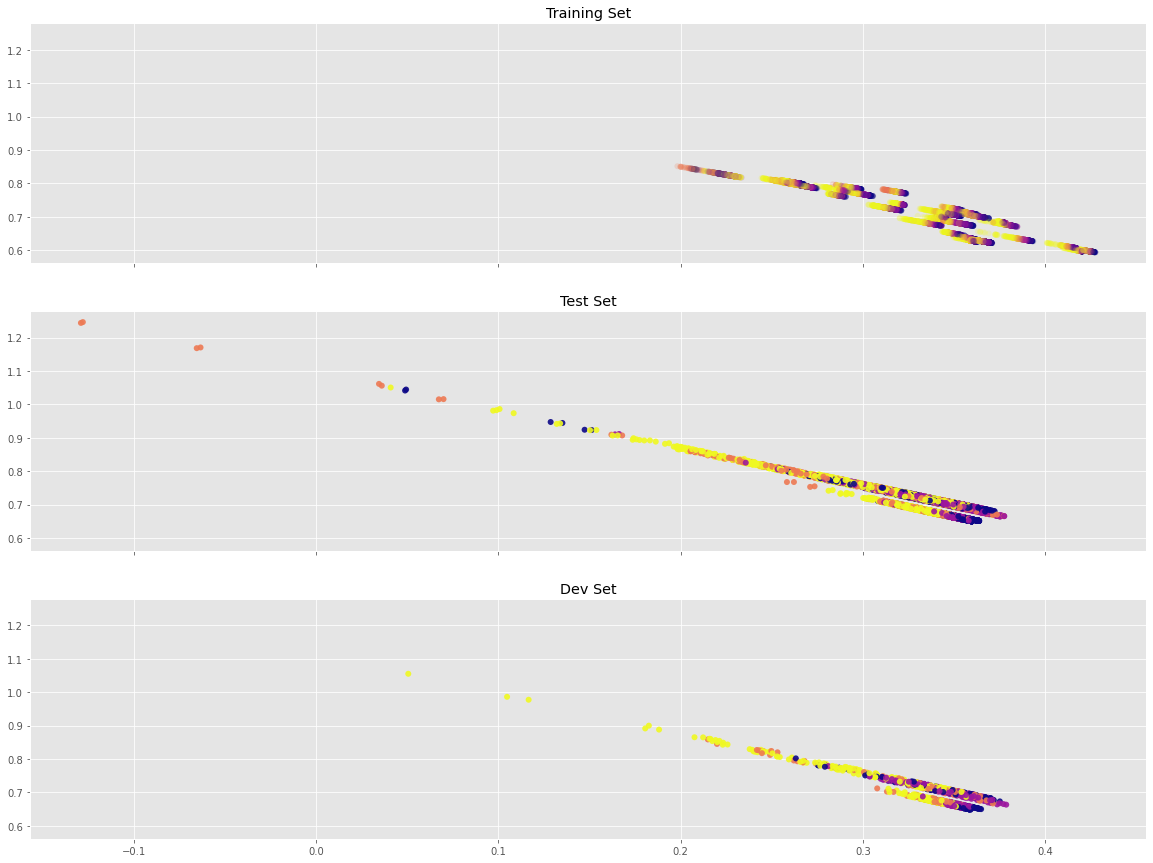

In [85]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15), sharex=True, sharey=True)
axes = axes.flatten()
#fig.delaxes(axes[-1])
############### TRAIN SET #####################
labels = trainset.Distance.replace({
    '1.2' : 0,
    '1.8' : 1,
    '3.0' : 2,
    '4.5' : 3
}).values
axes[0].scatter(X_new[:, 0], X_new[:, 1], alpha=0.2, edgecolor='none', c=labels, cmap='plasma');
axes[0].set_title('Training Set')
############## TEST SET ########################
labels = testset.Distance.replace({
    '1.2' : 0,
    '1.8' : 1,
    '3.0' : 2,
    '4.5' : 3
}).values
axes[1].scatter(test_new[:, 0], test_new[:, 1], alpha=0.9, edgecolor='none', c=labels, cmap='plasma');
axes[1].set_title('Test Set');
############## DEV SET ########################
labels = devset.Distance.replace({
    '1.2' : 0,
    '1.8' : 1,
    '3.0' : 2,
    '4.5' : 3
}).values
axes[2].scatter(dev_new[:, 0], dev_new[:, 1], alpha=0.9, edgecolor='none', c=labels, cmap='plasma');
axes[2].set_title('Dev Set');


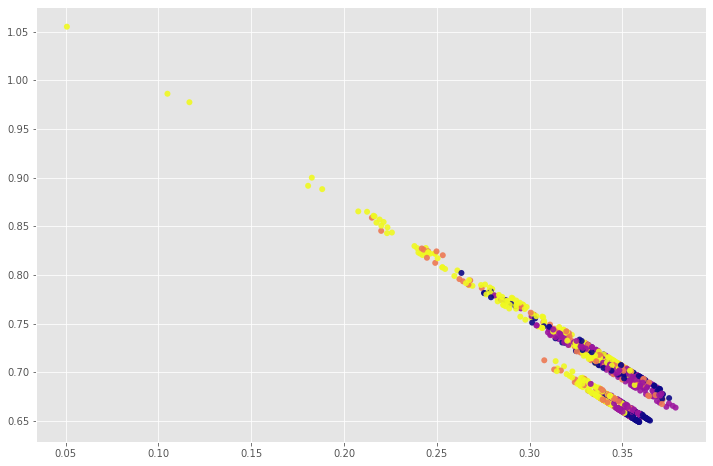

In [86]:
plt.figure(figsize=(12, 8))
labels = devset.Distance.replace({
    '1.2' : 0,
    '1.8' : 1,
    '3.0' : 2,
    '4.5' : 3
}).values
plt.scatter(dev_new[:, 0], dev_new[:, 1], alpha=0.9, edgecolor='none', c=labels, cmap='plasma');